<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [36]:
import pandas as pd

In [37]:
import numpy as np

In [40]:
import matplotlib.ticker as ticker

Load the dataset into a dataframe.


In [30]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [42]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


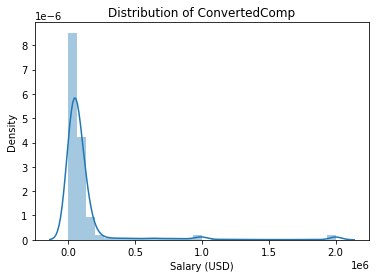

In [9]:
# Plotting the distribution curve
sns.distplot(df['ConvertedComp'], bins=30, kde=True)

# Setting plot title and labels
plt.title('Distribution of ConvertedComp')
plt.xlabel('Salary (USD)')
plt.ylabel('Density')

# Display the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


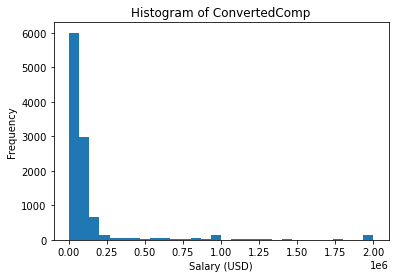

In [10]:
# your code goes here
# Plotting the histogram
plt.hist(df['ConvertedComp'], bins=30)

# Setting plot title and labels
plt.title('Histogram of ConvertedComp')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
median_salary = df['ConvertedComp'].median()
print("Median Salary:", median_salary)


Median Salary: 57745.0


How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
Responders = df['Gender'].value_counts()
man_count = Responders['Man']
print("Number of responders identifying as only Man:", man_count)

Number of responders identifying as only Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
woman_median = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp of responders identifying as only Woman:", woman_median)

Median ConvertedComp of responders identifying as only Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
age_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])
print("Five-Number Summary for Age:")
print(age_summary[['min', '25%', '50%', '75%', 'max']])


Five-Number Summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


In [20]:
age_summary = df['Age'].quantile([0, 0.25, 0.5, 0.75, 1])
print("Five-Number Summary for Age:")
print(age_summary)


Five-Number Summary for Age:
0.00    16.0
0.25    25.0
0.50    29.0
0.75    35.0
1.00    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


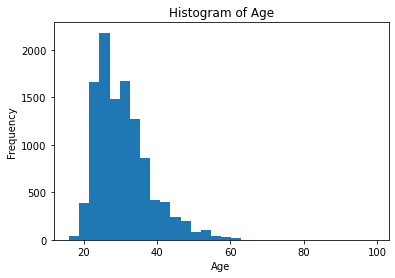

In [24]:
# your code goes here
# Plotting the histogram
plt.hist(df['Age'], bins=30)

# Setting plot title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


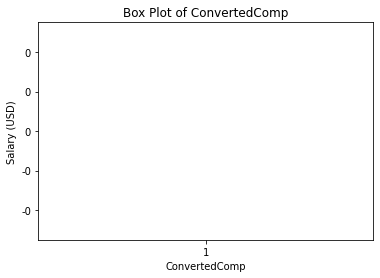

In [41]:

# Creating the box plot
plt.boxplot(df['ConvertedComp'])

# Setting plot title and labels
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Salary (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 


# Display the plot
plt.show()


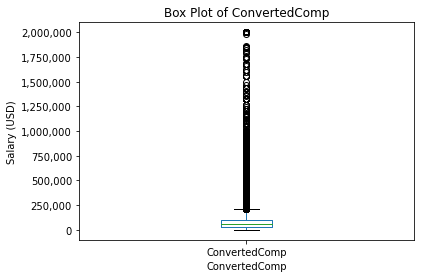

In [44]:
df.boxplot(column =['ConvertedComp'],grid=False)   
# Setting plot title and labels
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Salary (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 


plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [45]:
# your code goes here
import pandas as pd

# Assuming you have a DataFrame named 'df' with a column 'ConvertedComp'

# Calculate Q1 (first quartile)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate Q3 (third quartile)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [47]:
# your code goes here
# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [48]:
# your code goes here
# Count the number of outliers
num_outliers = ((df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)).sum()

print("Number of outliers:", num_outliers)

Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [54]:
# your code goes here
df_filtered = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Reset the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

df_filtered[['ConvertedComp']].head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,65277.0
4,31140.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [56]:
# your code goes here

# Select the numerical columns
numerical_columns = df_filtered.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Get the correlation values between 'Age' and other columns
age_correlation = correlation_matrix['Age']

print(age_correlation)


Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
